## Going through dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/case_study_data.csv'
df = pd.read_csv(file_path)
df.head()

,complaint_id,product_group,text
0,2815595,bank_service,On XX/XX/2017 my check # XXXX was debited from...
1,2217937,bank_service,I opened a Bank of the the West account. The a...
2,2657456,bank_service,wells fargo in nj opened a business account wi...
3,1414106,bank_service,A hold was placed on my saving account ( XXXX ...
4,1999158,bank_service,Dear CFPB : I need to send a major concern/com...


In [ ]:
len(df)

268246

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268246 entries, 0 to 268245
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   complaint_id   268246 non-null  int64 
 1   product_group  268246 non-null  object
 2   text           268246 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [ ]:
df.describe()

,complaint_id
count,2.682460e+05
mean,2.306764e+06
std,4.910491e+05
min,1.290155e+06
25%,1.907010e+06
50%,2.413670e+06
75%,2.738732e+06
max,2.995824e+06


In [ ]:
df['product_group'].unique()

array(['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage'],
      dtype=object)

In [ ]:
pd.reset_option('display.max_colwidth')
df_bank_service = df[df['product_group'] == 'bank_service']
df_bank_service['text'].head(5)

,text
0,On XX/XX/2017 my check # XXXX was debited from...
1,I opened a Bank of the the West account. The a...
2,wells fargo in nj opened a business account wi...
3,A hold was placed on my saving account ( XXXX ...
4,Dear CFPB : I need to send a major concern/com...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['product_group_numeric'] = label_encoder.fit_transform(df['product_group'])
df.head()

,complaint_id,product_group,text,product_group_numeric
0,2815595,bank_service,On XX/XX/2017 my check # XXXX was debited from...,0
1,2217937,bank_service,I opened a Bank of the the West account. The a...,0
2,2657456,bank_service,wells fargo in nj opened a business account wi...,0
3,1414106,bank_service,A hold was placed on my saving account ( XXXX ...,0
4,1999158,bank_service,Dear CFPB : I need to send a major concern/com...,0


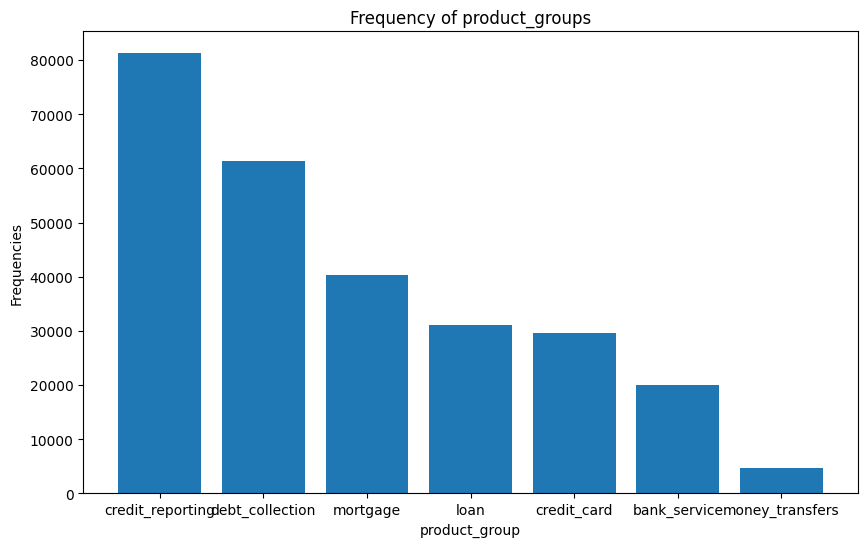

In [ ]:
import matplotlib.pyplot as plt
frequencies = df['product_group'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(frequencies.index, frequencies.values)
plt.xlabel('product_group')
plt.ylabel('Frequencies')
plt.title('Frequency of product_groups')
plt.show()

## Logistic Regression

In [ ]:
X = df['text']
y = df['product_group_numeric']

In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
print(df.head())

   complaint_id product_group  \
0       2815595  bank_service   
1       2217937  bank_service   
2       2657456  bank_service   
3       1414106  bank_service   
4       1999158  bank_service   

                                                text  product_group_numeric  \
0  On XX/XX/2017 my check # XXXX was debited from...                      0   
1  I opened a Bank of the the West account. The a...                      0   
2  wells fargo in nj opened a business account wi...                      0   
3  A hold was placed on my saving account ( XXXX ...                      0   
4  Dear CFPB : I need to send a major concern/com...                      0   

                                          clean_text  
0  on xxxx my check xxxx was debited from my chec...  
1  i opened a bank of the the west account the ac...  
2  wells fargo in nj opened a business account wi...  
3  a hold was placed on my saving account xxxx be...  
4  dear cfpb i need to send a major concerncompla..

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['product_group_numeric']
print(X[0])

  (0, 4970)	0.24883519561799108
  (0, 725)	0.283833107456973
  (0, 1146)	0.2582563207579494
  (0, 727)	0.16358472814541047
  (0, 38)	0.07659321797272287
  (0, 4854)	0.2321180692080385
  (0, 662)	0.23415145560801445
  (0, 3776)	0.1330282932197971
  (0, 1007)	0.14759629261711643
  (0, 1519)	0.3213258570785056
  (0, 1907)	0.25318598297485284
  (0, 1076)	0.2157316202517736
  (0, 444)	0.1079160919252468
  (0, 214)	0.1823262899747832
  (0, 3948)	0.29005255546407405
  (0, 234)	0.17515835772006536
  (0, 980)	0.2896147284897616
  (0, 565)	0.20839038338287125
  (0, 978)	0.16570586060244552
  (0, 2899)	0.15509431331410106
  (0, 3417)	0.14440613136345987
  (0, 3162)	0.10007919896855433
  (0, 1052)	0.1634990334658887


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[0])

0


In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle


clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

filename = "/content/drive/MyDrive/logistic_regression_cc.pkl"
with open(filename, "wb") as f:
    pickle.dump(clf, f)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3953
           1       0.80      0.80      0.80      5958
           2       0.86      0.87      0.86     16240
           3       0.82      0.84      0.83     12283
           4       0.82      0.78      0.80      6166
           5       0.82      0.70      0.76       951
           6       0.92      0.93      0.93      8099

    accuracy                           0.84     53650
   macro avg       0.84      0.82      0.83     53650
weighted avg       0.84      0.84      0.84     53650



In [ ]:
# !pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

# !apt-get update
# !apt-get install -y cuda
# import cuda
# import cudf
# from cuml.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# df2 = cudf.DataFrame(df)

# X2 = vectorizer.fit_transform(df2['clean_text'])
# y2 = df2['product_group']

# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# clf = LogisticRegression()
# clf.fit(X2_train, y2_train)

# y2_pred = clf.predict(X2_test)

# from sklearn.metrics import classification_report
# print(classification_report(y2_test, y2_pred))

## Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, max_features="sqrt", n_jobs=-1, random_state=42, verbose=1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

filename_rfc = "/content/drive/MyDrive/random_forest_cc.pkl"
with open(filename_rfc, "wb") as f:
    pickle.dump(rf_model, f)

print(classification_report(y_test, y_pred_rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


              precision    recall  f1-score   support

           0       0.80      0.72      0.76      3953
           1       0.82      0.70      0.76      5958
           2       0.76      0.92      0.83     16240
           3       0.81      0.80      0.80     12283
           4       0.87      0.66      0.75      6166
           5       0.98      0.24      0.39       951
           6       0.91      0.91      0.91      8099

    accuracy                           0.81     53650
   macro avg       0.85      0.71      0.74     53650
weighted avg       0.82      0.81      0.81     53650



## XG Boost

In [ ]:
!pip install xgboost
import xgboost as xgb

In [ ]:
from sklearn.metrics import classification_report
import pickle

xgb_model = xgb.XGBClassifier(
    n_estimators=200,        # Number of trees
    learning_rate=0.05,       # Step size shrinkage
    random_state=42,         # Ensures reproducibility
    tree_method="hist",
    n_jobs=-1
    # device = 'cuda' # Enables GPU acceleration
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

filename_xgb = "/content/drive/MyDrive/xg_boost_cc.pkl"
with open(filename_xgb, "wb") as f:
    pickle.dump(xgb_model, f)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3953
           1       0.80      0.78      0.79      5958
           2       0.84      0.85      0.84     16240
           3       0.79      0.82      0.81     12283
           4       0.79      0.76      0.77      6166
           5       0.85      0.65      0.74       951
           6       0.91      0.90      0.91      8099

    accuracy                           0.82     53650
   macro avg       0.82      0.79      0.81     53650
weighted avg       0.82      0.82      0.82     53650



In [ ]:
# from sklearn.metrics import classification_report
# import pickle

# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200]
# }

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, f1_score

# scoring = make_scorer(f1_score, average='macro')

# xgb_model = xgb.XGBClassifier(objective='multi:softmax',
#     num_class=7,
#     n_estimators=200,        # Number of trees
#     learning_rate=0.05,       # Step size shrinkage
#     random_state=42,         # Ensures reproducibility
#     tree_method="hist",
#     device = 'cuda' # Enables GPU acceleration
# )

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scoring)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, **best_params)
# best_xgb_model.fit(X_train, y_train)

# y_pred = best_xgb_model.predict(X_test)

# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

RNN

In [ ]:
!pip install tensorflow
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_sparse = vectorizer.fit_transform(df['clean_text'])

X = X_sparse.astype(np.float32).toarray()
y = df['product_group_numeric']

X, _, y, _ = train_test_split(X, y, test_size=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

rnn_model = Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[1])),
    Dense(len(np.unique(y)), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

rnn_loss, rnn_acc = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Model Accuracy: {rnn_acc}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7493 - loss: 0.7721 - val_accuracy: 0.8307 - val_loss: 0.5078
Epoch 2/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8421 - loss: 0.4759 - val_accuracy: 0.8278 - val_loss: 0.5100
Epoch 3/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8460 - loss: 0.4611 - val_accuracy: 0.8265 - val_loss: 0.5128
Epoch 4/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8476 - loss: 0.4512 - val_accuracy: 0.8275 - val_loss: 0.5158
Epoch 5/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8502 - loss: 0.4450 - val_accuracy: 0.8252 - val_loss: 0.5184
Epoch 6/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8493 - loss: 0.4484 - val_accuracy: 0.8278 - val_loss: 0.5176
Epoch 7/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8508 - loss: 0.4410 - val_accuracy: 0.8268 - val_loss: 0.5158
Epoch 8/10
3354/3354 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8534 - loss: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text']).astype(np.float32)
y = df['product_group_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.toarray()
X_test = X_test.toarray()

X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm_model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dense(len(np.unique(y)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

lstm_loss, lstm_acc = lstm_model.evaluate(X_test_rnn, y_test)
print(f"LSTM Model Accuracy: {lstm_acc}")

Epoch 1/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 76s 11ms/step - accuracy: 0.7676 - loss: 0.7117 - val_accuracy: 0.8370 - val_loss: 0.4877
Epoch 2/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 87s 12ms/step - accuracy: 0.8442 - loss: 0.4607 - val_accuracy: 0.8416 - val_loss: 0.4680
Epoch 3/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 87s 12ms/step - accuracy: 0.8519 - loss: 0.4325 - val_accuracy: 0.8433 - val_loss: 0.4554
Epoch 4/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 132s 11ms/step - accuracy: 0.8582 - loss: 0.4072 - val_accuracy: 0.8466 - val_loss: 0.4464
Epoch 5/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 86s 12ms/step - accuracy: 0.8641 - loss: 0.3868 - val_accuracy: 0.8489 - val_loss: 0.4411
Epoch 6/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.8708 - loss: 0.3691 - val_accuracy: 0.8495 - val_loss: 0.4405
Epoch 7/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 76s 11ms/step - accuracy: 0.8760 - loss: 0.3524 - val_accuracy: 0.8497 - val_loss: 0.4406
Epoch 8/10
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - accuracy: 0.8840 